Dans cette leçon, nous aborderons un ensemble de données du monde réel. Nous utiliserons les bibliothèques python (Pandas, NumPy, Matplotlib) pour analyser un ensemble de données sur **les propriétés chimiques du vin** et **leurs scores de qualité associés**. Dans cette leçon, vous pourrez acquérir une expérience pratique concernant :

    L'évaluation et le nettoyage des données
    L'ingénierie des caractéristiques
    La visualisation de vos résultats
    

## Rappel sur le processus d'analyse de données :

### Questionnement --> Acquisition (Collecte, Évaluation, Nettoyage) --> Analyse (Statistiques, Visualisations)
###  --> Conclusions --> Partage des résultats

## 1. Aperçu des données

Attributs de chaque ensemble de données :

### Propriétés physico-chimiques

1. Acidité fixe
2. 	Acidité volatile
3. 	Acide citrique
4. 	Sucre résiduel
5. 	Chlorures
6. 	Dioxyde de soufre libre
7. 	Dioxyde de soufre total
8. 	Densité
9. 	pH
10. Sulfites
11. Alcool

### Cote de qualité
12. Qualité - Note entre 0 et 10 (médiane d'au moins 3 évaluations effectuées par des experts)

## 2. Poser des questions

- Quelles sont les caractéristiques chimiques les plus importantes pour prédire la qualité du vin ?
- Y a-t-il un certain type de vins (rouge ou blanc) associé à une qualité supérieure ?
- Les vins les plus alcoolisés sont-ils mieux notés ?
- Les vins plus sucrés reçoivent-ils de meilleures notes ?
- Quel est le niveau d'acidité associé à la plus haute qualité ?
- ...

## 3. Acquisition des données

### 3.1. Collecte des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

*Importer le jeu de données sur les vins rouges*

In [2]:
red_wines = pd.read_csv('datasets/winequality-red.csv', sep=';')
red_wines.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur-dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


*Importer le jeu de données sur les vins blancs*

In [3]:
white_wines = pd.read_csv('datasets/winequality-white.csv', sep=';')

In [4]:
white_wines.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### 3.2. Évaluation et Nettoyage des données

Dans notre cas il s'agira de chercher les informations suivantes :
- nombre d'échantillons dans chaque ensemble de données
- nombre de colonnes dans chaque ensemble de données
- caractéristiques avec valeurs manquantes
- lignes dupliquées dans l'ensemble de données sur le vin blanc
- nombre de valeurs uniques pour la qualité dans chaque ensemble de données
- densité moyenne de l'ensemble de données sur le vin rouge


In [5]:
red_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur-dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
red_wines.shape

(1599, 12)

In [7]:
# nombre de lignes dupliquées
sum(red_wines.duplicated())

240

In [8]:
white_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


#### Suppression des doublons dans les jeux de données

*vins rouges*

In [9]:
red_wines = red_wines[~red_wines.duplicated()]
# on vérifie que les doublons ont été supprimés
sum(red_wines.duplicated())

0

In [10]:
red_wines.shape

(1359, 12)

vins blancs

In [11]:
white_wines = white_wines[~white_wines.duplicated()]
# on vérifie que les doublons ont été supprimés
sum(white_wines.duplicated())

0

In [12]:
white_wines.shape

(3961, 12)

Nous allons combiner dans un premier temps combiner les deux jeux de données en un seul; avant de le faire nous allons rajouter une colonne à chacun pour garder une trace du type de vin (rouge ou blanc) : 

![Combine wine datasets](basics_images/combine_wine_datasets.png)

Nous utiliserons pour cela `numpy` pour sa rapidité; voici un exemple qui l'illustre : 

In [13]:
from time import time
a = np.random.random(100000000)

start = time()
sum(a)/len(a)
print(time() - start, "secondes")

17.127955436706543 secondes


In [14]:
start = time()
np.mean(a)
print(time() - start, "secondes")

0.2979862689971924 secondes


*Création des arrays de couleur pour les deux jeux de données*

In [15]:
red_color = np.repeat("red", len(red_wines))
white_color = np.repeat("white", len(white_wines))

*Ajout des colonnes*

In [16]:
red_wines["color"] = red_color
white_wines["color"] = white_color

In [17]:
red_wines.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur-dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red


In [18]:
white_wines.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,white


In [19]:
# on renomme la colonne total_sulfur-dioxide en total_sulfur_dioxide pour les vins rouges
red_wines = red_wines.rename(columns={'total_sulfur-dioxide': 'total_sulfur_dioxide'})
red_wines.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

*Création du dataframe combiné*

In [20]:
vins = pd.concat([red_wines, white_wines])

In [21]:
vins.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red


In [22]:
vins.shape

(5320, 13)

*Sauvegarde du nouveau jeu de données*

In [23]:
vins.to_csv('datasets/vins.csv', index=False)

In [24]:
vins = pd.read_csv('datasets/vins.csv')
vins.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red


## 4. Explorations avec des visualisations 

### 4.1 Explorations univariées de quelques colonnes

*Histogramme des propriétés suivantes : `Acidité fixe, dioxyde de soufre total, pH, alcool`*

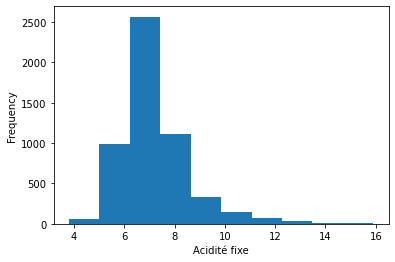

In [25]:
# acidité fixe
vins['fixed_acidity'].plot(kind='hist')
plt.xlabel('Acidité fixe');

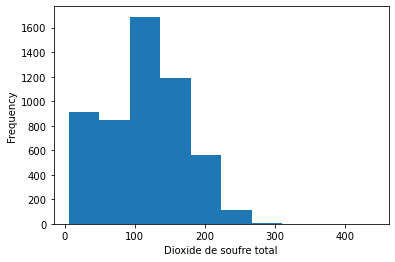

In [26]:
# dioxide de soufre total
vins['total_sulfur_dioxide'].plot(kind='hist')
plt.xlabel('Dioxide de soufre total');

### 4.2 Explorations bivariées de quelques colonnes par rapport au score final

*Nuage de points des caractéristiques suivantes par rapport au score final : `Acidité volatile, sucre résiduel, pH, alcool`*

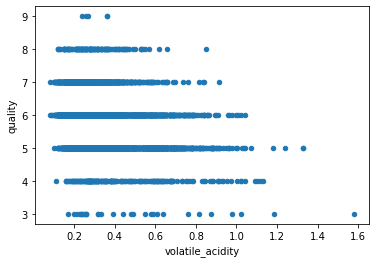

In [27]:
vins.plot(kind='scatter', x='volatile_acidity', y='quality');

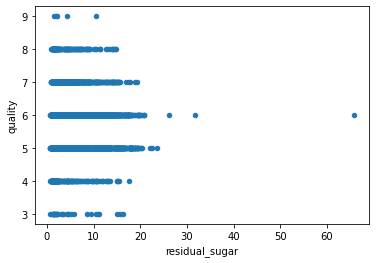

In [28]:
vins.plot(kind='scatter', x='residual_sugar', y='quality');

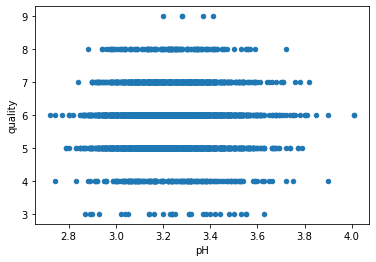

In [29]:
vins.plot(kind='scatter', x='pH', y='quality');

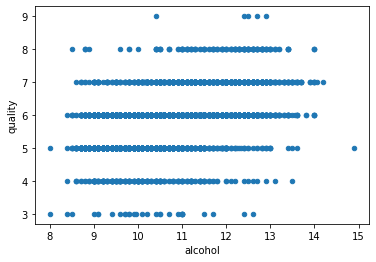

In [30]:
vins.plot(kind='scatter', x='alcohol', y='quality');

#### fonction `groupby` de pandas

La fonction `groupby` vous permet de regrouper vos données par une ou plusieurs colonnes spécifiques et de créer des informations agrégées sur ces regroupements. Elle permet également des transformations propres à chaque groupe. Dans cette section, nous utiliserons groupby pour obtenir des statistiques récapitulatives sur les différents groupes dans nos données :

In [31]:
vins.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red


##### Q1 : Un certain type de vin (rouge ou blanc) est-il associé à une qualité supérieure ?

In [32]:
vins.groupby('color').mean()[["quality"]]

,quality
color,
red,5.623252
white,5.854835


**Conclusion** : Les vins blancs ont en général de meilleures notes que les vins rouges.

##### Q2 : Quel niveau d'acidité (valeur du pH) obtient la note moyenne la plus élevée ?

In [33]:
# Voir les valeurs min, 25%, 50%, 75%, max du pH avec Pandas describe
vins.describe()[['pH']]

,pH
count,5320.000000
mean,3.224664
std,0.160379
min,2.720000
25%,3.110000
50%,3.210000
75%,3.330000
max,4.010000


In [34]:
vins.shape
vins.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [35]:
# bords des blocs qui seront utilisés pour "couper" les données en groupes
bin_edges = [2.72, 3.11, 3.21, 3.33, 4.01] # à remplir

In [36]:
# Labels pour les quatre niveaux d'acidité
bin_names = ['élevé', 'modérément élevé', 'moyen', 'faible']

In [37]:
# Creation de la colonne acidity_levels 
vins['acidity_levels'] = pd.cut(vins['pH'], bin_edges, labels=bin_names)

# Vérification que la colonne a bien été créée
# ici la fonction cut prend en paraùètres la liste des données, les bornes, et les noms des bornes et renvoie dans une colone
vins.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,faible
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,modérément élevé
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,moyen
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,modérément élevé
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,faible


In [38]:
# sauvevegarde du fichier
vins.to_csv('winequality_edited.csv', index=False)

In [39]:
vins.groupby('acidity_levels').mean()[['quality']]

,quality
acidity_levels,
élevé,5.728024
modérément élevé,5.766917
moyen,5.852624
faible,5.834254


#les vins les mieux notés sont ceux avec une acidité moyenne conrairement à ceux qui ont une acidité elevé qui sont moins bien noté

#### fonction `query` de pandas

In [40]:
# selection des vins blancs uniquement
vins.query('pH>2')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,faible
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,modérément élevé
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,moyen
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,modérément élevé
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,red,faible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,moyen
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,modérément élevé
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,élevé
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,faible


In [41]:
vins[vins['pH']>4]
# autre methode

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
1121,5.4,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6,red,faible
1125,5.0,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6,red,faible


In [42]:
vins.query('pH>2 and  pH<3 ')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
80,8.6,0.49,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6,red,élevé
85,8.6,0.49,0.29,2.0,0.110,19.0,133.0,0.99720,2.93,1.98,9.8,5,red,élevé
135,9.2,0.52,1.00,3.4,0.610,32.0,69.0,0.99960,2.74,2.00,9.4,4,red,élevé
318,12.5,0.46,0.63,2.0,0.071,6.0,15.0,0.99880,2.99,0.87,10.2,5,red,élevé
383,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8,red,élevé
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5236,6.6,0.28,0.09,10.9,0.051,37.0,131.0,0.99566,2.93,0.62,9.5,6,white,élevé
5237,6.0,0.17,0.30,7.3,0.039,39.0,104.0,0.99252,2.91,0.57,11.0,6,white,élevé
5246,6.1,0.41,0.20,12.6,0.032,54.0,136.0,0.99516,2.91,0.43,10.6,6,white,élevé
5279,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.0,6,white,élevé


In [43]:
# ou encore
vins[(vins['pH']>2) & (vins['color']=='red')]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,faible
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,modérément élevé
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,moyen
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,modérément élevé
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,red,faible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,red,faible
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red,faible
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red,faible
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red,faible


In [44]:
vins['pH']>4

0       False
1       False
2       False
3       False
4       False
        ...  
5315    False
5316    False
5317    False
5318    False
5319    False
Name: pH, Length: 5320, dtype: bool

##### Q1 : Les vins à teneur plus élevée en alcool sont-ils mieux notés ?

Pour répondre à cette question, utilisons `query` pour créer deux groupes d'échantillons de vin :

- Faible teneur en alcool (échantillons dont la teneur en alcool est inférieure à la médiane)
- Teneur élevée en alcool (échantillons dont la teneur en alcool est supérieure ou égale à la médiane)


In [45]:
alc_median = vins['alcohol'].median()
alc_median

10.4

In [46]:
low_alcohol=vins.query('alcohol < {}'.format(alc_median))
low_alcohol.shape

(2607, 14)

In [47]:
hight_alcohol=vins.query(f'alcohol >= {alc_median}')
hight_alcohol.shape

(2713, 14)

In [48]:
print(low_alcohol.quality.mean())
print(hight_alcohol.quality.mean())
# ou encore low_alcohol.mean()['quality']

5.439202148062908
6.138223368964246


 conclusion: les vins en teneur en alcol elevé sont en général mieux notés que les autres

##### Q2 : Les vins plus sucrés (plus de sucre résiduel) reçoivent-ils de meilleures notes ?

De la même façon, utilisons la médiane pour diviser les échantillons en deux groupes en fonction du sucre résiduel et trouvons la cote de qualité moyenne de chaque groupe :

In [49]:
suggar_median = vins['residual_sugar'].median()
suggar_median

2.7

In [50]:
low_suggar=vins.query('residual_sugar < {}'.format(suggar_median))
low_suggar.shape

(2601, 14)

In [51]:
hight_suggar=vins.query('residual_sugar >= {}'.format(suggar_median))
hight_suggar.shape

(2719, 14)

In [52]:
print(low_suggar.quality.mean())
print(hight_suggar.quality.mean())
# ou encore low_suggar.mean()['quality']

5.78316032295271
5.807649871276205


In [53]:
print(low_suggar.mean()['quality'])

5.78316032295271


#### Tracé de la corrélation qualité et type

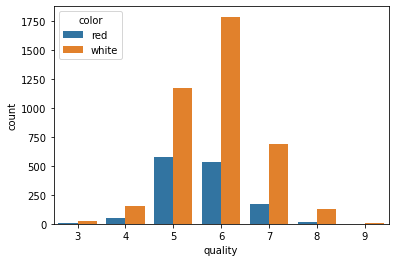

In [54]:
sb.countplot(data=vins, x='quality', hue='color');

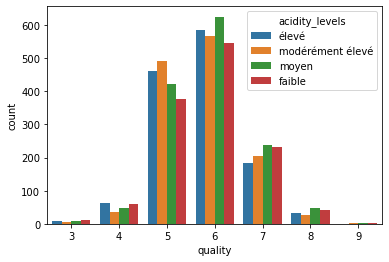

In [55]:
sb.countplot(data=vins, x='quality', hue='acidity_levels');

In [56]:
red_wines.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red


In [57]:
red_wines['produit']='0'

In [58]:
red_wines.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,produit
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,0


In [60]:
del red_wines['produit']

In [61]:
red_wines.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red


In [62]:
red_wines['produit']='0'

In [63]:
red_wines.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,produit
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,0


In [65]:
red_wines.pop('produit')

0       0
1       0
2       0
3       0
5       0
       ..
1593    0
1594    0
1595    0
1597    0
1598    0
Name: produit, Length: 1359, dtype: object

In [66]:
red_wines.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red


In [73]:
red_wines['produit']='0'

In [74]:
red_wines.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,produit
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,0


In [75]:
red_wines.drop(columns=["produit"])

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,red
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red
